In [6]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Show first 5 rows of the dataset
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# Separate the features (X) and target (y)
X = data.drop(columns=['MedHouseVal'])
y = data['MedHouseVal']

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (16512, 8)
Testing data shape: (4128, 8)


In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


In [10]:
# Predict on the test data
y_pred = model.predict(X_test)

# Display first few predictions
print("First 10 Predicted Prices:", y_pred[:10])
print("First 10 Actual Prices:", y_test[:10].values)


First 10 Predicted Prices: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725 2.01175367
 2.64550005 2.16875532 2.74074644 3.91561473]
First 10 Actual Prices: [0.477   0.458   5.00001 2.186   2.78    1.587   1.982   1.575   3.4
 4.466  ]


In [11]:
# Calculate RMSE and R² Score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation:
RMSE (Root Mean Squared Error): 0.75
R² Score: 0.58


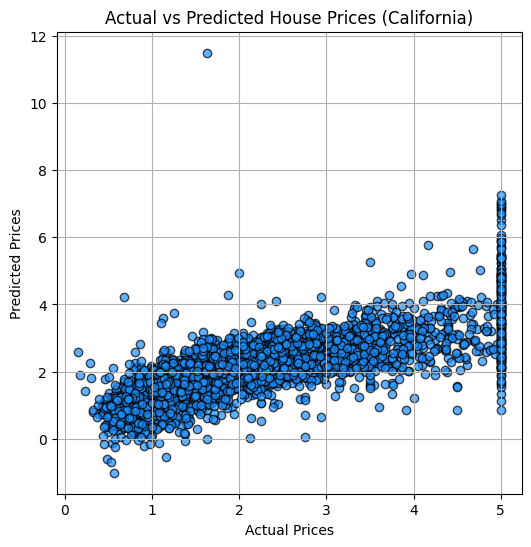

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolors='black', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (California)")
plt.grid(True)
plt.show()


In [15]:
import joblib

# Save the trained model to a file
joblib.dump(model, "california_linear_regression_model.pkl")

print("💾 Model saved successfully!")


💾 Model saved successfully!


In [16]:
# Calculate RMSE and R² Score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation:
RMSE (Root Mean Squared Error): 0.75
R² Score: 0.58
